In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
base_path = '../../data/ecb'
sorted(os.listdir(base_path))

['Europe - Number of cards with a payment function.csv',
 'Europe - Number of total payment transactions involving non-MFIs.csv',
 'Europe - Value of total payment transactions.csv',
 'Spain - Number of card payments.csv',
 'Spain - Number of payments - credit and:or delayed debit function.csv',
 'Spain - Value of card payments - credit and:or delayed debit function.csv',
 'Spain - Value of card payments.csv']

In [3]:
def get_overall_growth(df: pd.DataFrame) -> float:
    return df.loc[df['year'] == df['year'].max(), 's1'].values[0] / \
    df.loc[df['year'] == df['year'].min(), 's1'].values[0]


def get_last_year_percentage_growth(df: pd.DataFrame) -> float:
    return ((df.loc[df['year'] == df['year'].max(), 's1'].values[0] / \
        df.loc[df['year'] == df['year'].max()-1, 's1'].values[0]) - 1) * 100

## Content Table:

1. [Europe Data](#europe)
    1. [Number of Payments Cards Issued](#europe1)
    2. [Total Number of Non-Cash Payments](#europe2)
    3. [Card Value](#europe3)
2. [Spain Data](#spain)

5. [Dashboads](#5)

# Europe Data <a class="anchor" id="europe"></a>

## Number of payment cards issued <a class="anchor" id="europe1"></a>

In [4]:
df_cards_issued = pd.read_csv(
    f'{base_path}/Europe - Number of cards with a payment function.csv', delimiter=';')
df_cards_issued.drop(columns=['status1'], inplace=True)
df_cards_issued['date'] = pd.to_datetime(
    df_cards_issued['date'], format='%Y-%m-%d')
df_cards_issued.set_index('date', inplace=True)
df_cards_issued['year'] = df_cards_issued.index.year

In [5]:
# Absolute Max and Min
df_cards_issued.loc[
    (df_cards_issued['s1'] == df_cards_issued['s1'].max()) |
    (df_cards_issued['s1'] == df_cards_issued['s1'].min()),
    's1'] / 1_000_000

date
2000-12-31    294.245079
2021-12-31    637.740195
Name: s1, dtype: float64

In [6]:
# The Number of payment cards issued has doubled since 2000
get_overall_growth(df_cards_issued)

2.1673776063388304

In [7]:
# The Number of payment cards issued has grown by 4.63% from 2020 to 2021
get_last_year_percentage_growth(df_cards_issued)

4.6348715394708195

## Total Number of Non-Cash Payments <a class="anchor" id="2"></a>

In [8]:
df_card_payments = pd.read_csv(
    f'{base_path}/Europe - Number of total payment transactions involving non-MFIs.csv', 
    delimiter=';')
df_card_payments.drop(columns=['conf', 'status1'], inplace=True)
df_card_payments['date'] = pd.to_datetime(df_card_payments['date'], format='%Y-%m-%d')
df_card_payments.set_index('date', inplace=True)
df_card_payments['year'] = df_card_payments.index.year

In [9]:
# Absolute Max and Min
df_card_payments.loc[
    (df_card_payments['s1'] == df_card_payments['s1'].max()) |
    (df_card_payments['s1'] == df_card_payments['s1'].min()),
    's1'] / 1_000

date
2000-12-31     35.278046
2021-12-31    114.178232
Name: s1, dtype: float64

In [10]:
df_card_payments.loc[
    (df_card_payments['year'] == 2021) |
    (df_card_payments['year'] == 2020),
    's1'] / 1_000

date
2020-12-31    101.457306
2021-12-31    114.178232
Name: s1, dtype: float64

In [11]:
get_overall_growth(df_card_payments), get_last_year_percentage_growth(df_card_payments)

(3.236523700887515, 12.538205972076577)

## Value of total payment transactions <a class="anchor" id="3"></a>

In [12]:
df_card_value = pd.read_csv(
    f'{base_path}/Europe - Value of total payment transactions.csv', delimiter=';')
df_card_value.drop(columns=['conf', 'status1'], inplace=True)
df_card_value['date'] = pd.to_datetime(df_card_value['date'], format='%Y-%m-%d')
df_card_value.set_index('date', inplace=True)
df_card_value['year'] = df_card_value.index.year

In [13]:
# Absolute Max and Min €167.3
df_card_value.loc[
    (df_card_value['s1'] == df_card_value['s1'].max()) |
    (df_card_value['year'] == 2020) | (df_card_value['year'] == 2004) |
    (df_card_value['s1'] == df_card_value['s1'].min()),
    's1'] / 1_000_000

date
2004-12-31    177.910018
2005-12-31     90.522365
2020-12-31    166.035231
2021-12-31    196.950921
Name: s1, dtype: float64

In [14]:
get_overall_growth(df_card_value), get_last_year_percentage_growth(df_card_value)

(1.48021151473485, 18.619957948372033)

In [15]:
df_card_value.loc[df_card_value['year'] == df_card_value['year'].max(), 's1'].values[0] / \
df_card_value.loc[df_card_value['year'] == 2005, 's1'].values[0]

2.1757155823218866

# Spain Data <a class="anchor" id="spain"></a>

In [16]:
# 'Spain - Number of card payments.csv',
# 'Spain - Number of payments - credit and:or delayed debit function.csv',
# 'Spain - Value of card payments.csv',
# 'Spain - Value of card payments - credit and:or delayed debit function.csv',

In [17]:
df_card_payment_spain = pd.read_csv(
    f'{base_path}/Spain - Number of card payments.csv', delimiter=';')
df_card_payment_spain.drop(columns=['conf', 'status1', 's1zz'], inplace=True)
df_card_payment_spain['date'] = pd.to_datetime(
    df_card_payment_spain['date'], format='%Y-%m-%d')
df_card_payment_spain.set_index('date', inplace=True)
df_card_payment_spain['year'] = df_card_payment_spain.index.year
df_card_payment_spain.dropna(inplace=True)

(get_overall_growth(df_card_payment_spain), 
 get_last_year_percentage_growth(df_card_payment_spain))

(7.351903872414998, 27.471599849293394)

In [18]:
df_credit_card_payment_spain = pd.read_csv(
    f'{base_path}/Spain - Number of payments - credit and:or delayed debit function.csv', 
    delimiter=';')
df_credit_card_payment_spain.drop(columns=['conf', 'status1', 's1zz'], inplace=True)
df_credit_card_payment_spain['date'] = pd.to_datetime(
    df_credit_card_payment_spain['date'], format='%Y-%m-%d')
df_credit_card_payment_spain.set_index('date', inplace=True)
df_credit_card_payment_spain['year'] = df_credit_card_payment_spain.index.year
df_credit_card_payment_spain.dropna(inplace=True)

(get_overall_growth(df_credit_card_payment_spain), 
 get_last_year_percentage_growth(df_credit_card_payment_spain))

(5.8987817382995225, 30.240249603109447)

In [19]:
df_card_payment_value_spain = pd.read_csv(
    f'{base_path}/Spain - Value of card payments.csv', delimiter=';')
df_card_payment_value_spain.drop(columns=['conf', 'status1', 's1zz'], inplace=True)
df_card_payment_value_spain['date'] = pd.to_datetime(
    df_card_payment_value_spain['date'], format='%Y-%m-%d')
df_card_payment_value_spain.set_index('date', inplace=True)
df_card_payment_value_spain['year'] = df_card_payment_value_spain.index.year
df_card_payment_value_spain.dropna(inplace=True)

(get_overall_growth(df_card_payment_value_spain), 
 get_last_year_percentage_growth(df_card_payment_value_spain))

(5.179808037534212, 20.78136299857791)

In [20]:
df_credit_card_payment_value_spain = pd.read_csv(
    f'{base_path}/Spain - Value of card payments - credit and:or delayed debit function.csv', 
    delimiter=';')
df_credit_card_payment_value_spain.drop(columns=['conf', 'status1', 's1zz'], inplace=True)
df_credit_card_payment_value_spain['date'] = pd.to_datetime(
    df_credit_card_payment_value_spain['date'], format='%Y-%m-%d')
df_credit_card_payment_value_spain.set_index('date', inplace=True)
df_credit_card_payment_value_spain['year'] = df_credit_card_payment_value_spain.index.year
df_credit_card_payment_value_spain.dropna(inplace=True)

(get_overall_growth(df_credit_card_payment_value_spain), 
 get_last_year_percentage_growth(df_credit_card_payment_value_spain))

(3.9402549020476942, 24.683931614015584)

## Dashboards <a class="anchor" id="5"></a>

In [21]:
def set_year_xticks(df: pd.DataFrame, freq: int) -> None:
    min_year = df['year'].values.min()
    max_year = df['year'].values.max()
    plt.xticks(range(min_year, max_year+1, freq))

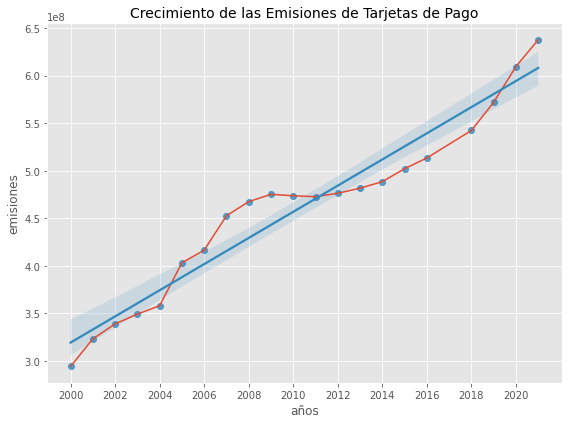

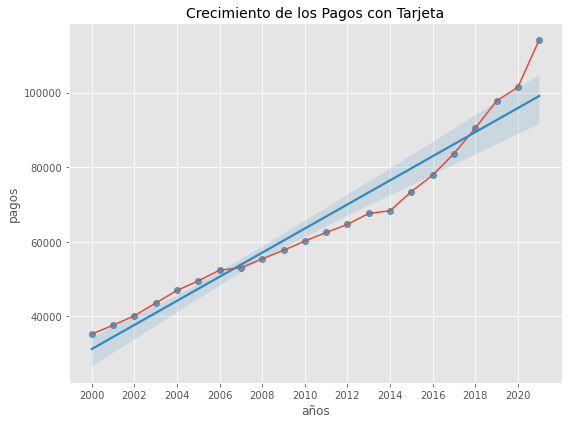

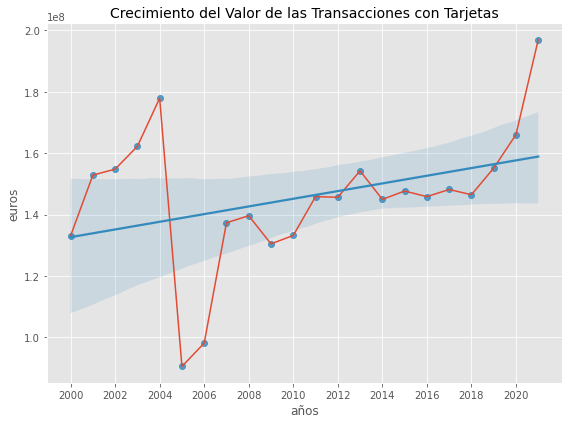

In [40]:
## euro charts
_ = plt.figure(figsize=[8,6])
sns.lineplot(data=df_cards_issued, x='year', y='s1', palette='colorblind')
sns.regplot(data=df_cards_issued, x='year', y='s1')
plt.title('Crecimiento de las Emisiones de Tarjetas de Pago', fontsize=14)
plt.xlabel('años')
plt.ylabel('emisiones')
set_year_xticks(df_cards_issued, 2)
plt.tight_layout()

_ = plt.figure(figsize=[8,6])
sns.lineplot(data=df_card_payments, x='year', y='s1', palette='colorblind')
sns.regplot(data=df_card_payments, x='year', y='s1')
plt.title('Crecimiento de los Pagos con Tarjeta', fontsize=14)
plt.xlabel('años')
plt.ylabel('pagos')
set_year_xticks(df_card_payments, 2)
plt.tight_layout()

_ = plt.figure(figsize=[8,6]) 
sns.lineplot(data=df_card_value, x='year', y='s1', palette='colorblind')
sns.regplot(data=df_card_value, x='year', y='s1')
plt.title('Crecimiento del Valor de las Transacciones con Tarjetas', fontsize=14)
plt.xlabel('años')
plt.ylabel('euros')
set_year_xticks(df_card_value, 2)
plt.tight_layout()

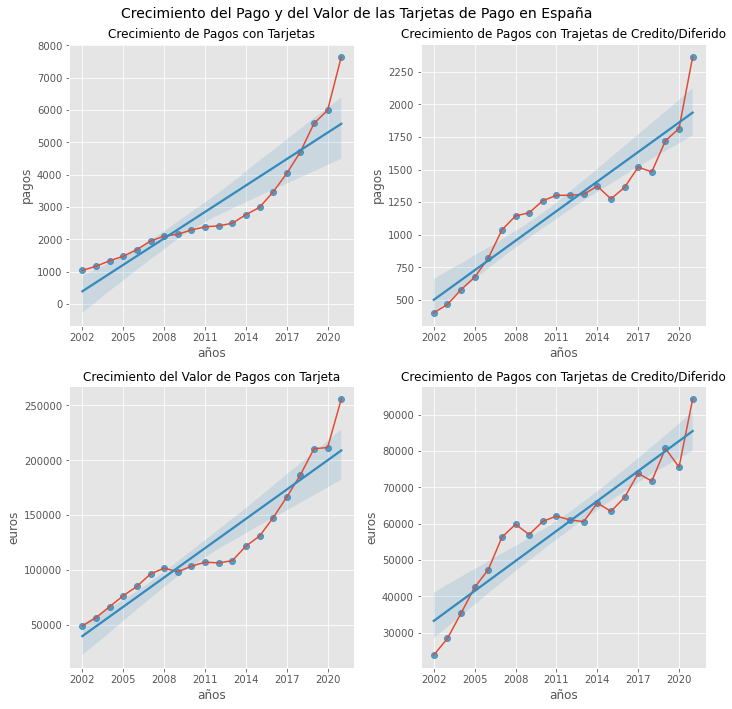

In [23]:
## spain charts
_ = plt.figure(figsize=[10,10])
plt.suptitle(
    'Crecimiento del Pago y del Valor de las Tarjetas de Pago en España', 
    fontsize=14)

plt.subplot(2,2,1)
sns.lineplot(
    data=df_card_payment_spain, x='year', y='s1', palette='colorblind')
sns.regplot(data=df_card_payment_spain, x='year', y='s1')
plt.title('Crecimiento de Pagos con Tarjetas', fontsize=12)
plt.xlabel('años')
plt.ylabel('pagos')
set_year_xticks(df_card_payment_spain, 3)

plt.subplot(2,2,2)
sns.lineplot(
    data=df_credit_card_payment_spain, x='year', y='s1', palette='colorblind')
sns.regplot(data=df_credit_card_payment_spain, x='year', y='s1')
plt.title('Crecimiento de Pagos con Trajetas de Credito/Diferido', fontsize=12)
plt.xlabel('años')
plt.ylabel('pagos')
set_year_xticks(df_credit_card_payment_spain, 3)

plt.subplot(2,2,3)
sns.lineplot(
    data=df_card_payment_value_spain, x='year', y='s1', palette='colorblind')
sns.regplot(data=df_card_payment_value_spain, x='year', y='s1')
plt.title('Crecimiento del Valor de Pagos con Tarjeta', fontsize=12)
plt.xlabel('años')
plt.ylabel('euros')
set_year_xticks(df_card_payment_value_spain, 3)

plt.subplot(2,2,4)
sns.lineplot(
    data=df_credit_card_payment_value_spain, x='year', y='s1', palette='colorblind')
sns.regplot(data=df_credit_card_payment_value_spain, x='year', y='s1')
plt.title('Crecimiento de Pagos con Tarjetas de Credito/Diferido', fontsize=12)
plt.xlabel('años')
plt.ylabel('euros')
set_year_xticks(df_credit_card_payment_value_spain, 3)

plt.tight_layout()

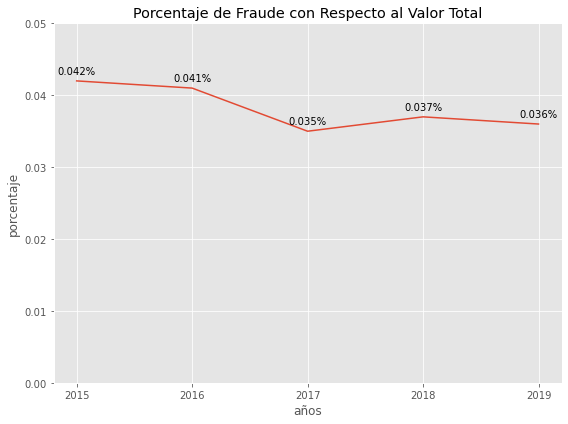

In [50]:
_ = plt.figure(figsize=[8,6])
ax = sns.lineplot(
    x=range(2015, 2020, 1),
    y=[0.042, 0.041, 0.035, 0.037, 0.036])
plt.title('Porcentaje de Fraude con Respecto al Valor Total')
plt.xlabel('años')
plt.xticks(range(min(years), max(years)+1, 1))
plt.ylabel('porcentaje')
plt.ylim([0,0.05])

for x_value, y_value in zip(ax.lines[0].get_xdata(), ax.lines[0].get_ydata()):
    label = '{:.3f}%'.format(y_value)
    ax.annotate(
        label,(x_value, y_value), 
        xytext=(0, 5),
        textcoords="offset points",
        ha='center', 
        va='bottom')

plt.tight_layout()